In [61]:
# SUBMISSION BELAJAR MACHINE LEARNING UNTUK PEMULA
# Ahmad Rizal Samsi
# ahmadrizalichal@ymail.com

## Import Library & Dataset

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os, shutil
from sklearn.model_selection import train_test_split

In [10]:
print(tf.__version__)

2.3.0


In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-27 12:43:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.56MB/s    in 43s     

2020-10-27 12:44:14 (7.11 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Make Directories & Split Dataset

In [11]:
#ekstrak dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [12]:
base_dir = '/tmp/rockpaperscissors'

roc_dir = os.path.join(base_dir, 'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(validation_dir)

train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)

val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [13]:
os.listdir('/tmp/rockpaperscissors/train')

['paper', 'scissors', 'rock']

In [14]:
os.listdir('/tmp/rockpaperscissors/val')

['paper', 'scissors', 'rock']

In [15]:
# split data train dan data validasi (validation: 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [16]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir, file), os.path.join(train_pap, file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir, file), os.path.join(train_sci, file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc, file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir, file), os.path.join(val_pap, file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir, file), os.path.join(val_sci, file))

## Image Augmentation

In [19]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
validation_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Modelling

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 256)      

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [53]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi diatas 96%, training dihentikan!")
      self.model.stop_training = True

callbacks = myCallback()

In [56]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 38s - loss: 0.1556 - accuracy: 0.9513 - val_loss: 0.2082 - val_accuracy: 0.9500
Epoch 2/20

Akurasi diatas 96%, training dihentikan!
25/25 - 37s - loss: 0.0911 - accuracy: 0.9712 - val_loss: 0.1693 - val_accuracy: 0.9563


## Prediction

Saving rizal_hand.jpg to rizal_hand.jpg
rizal_hand.jpg
this is paper


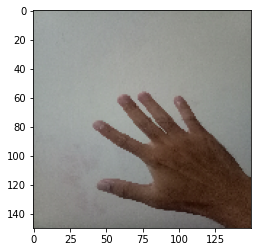

In [60]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('this is paper')
  elif classes[0,1]!=0:
    print('this is rock')
  else:
    print('this is scissors')